In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


In [3]:
#Create a dataframe with 3 variables of your choice from the Funda data set as your independent variables (X).
#the independent variable is price
df_subset = df[['area', 'rooms', 'year_built', 'price']]

In [4]:
#eliminating 'wrong' data
df_subset = df_subset[df_subset['price'] > 30000]
df_subset = df_subset[df_subset['rooms'] > 0]
df_subset = df_subset[df_subset['area'] > 0]
df_subset = df_subset[df_subset['year_built'] > 1850]

In [5]:
#creating the y and the x for the train/test set.
y = df_subset['price']
X = df_subset.loc[:,'area':'year_built'] #this slices the dataframe to include all rows and the columns
X.head()

,area,rooms,year_built
0,108,3,1906
1,47,2,1938
2,116,3,2003
3,58,3,1910
4,63,3,1906


In [6]:
#split the data into a test set and a train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.head()

,area,rooms,year_built
4597,70,4,1930
6920,44,2,1905
7645,111,3,1966
5245,71,4,1931
7305,141,5,1904


In [7]:
#training the model
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [8]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #df with the column names, and the coefficients of the model
coef

,0
4461.228314,area
-18151.718698,rooms
-1539.006178,year_built


In [9]:
#calculating the R^2 score
y_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score = r2_score(y_test, y_p)

print(f'The R^2 score is {r2_score}')
print(f'R^2: 65%')

The R^2 score is 0.6490322573408913
R^2: 65%


In [10]:
#calculating the RMSE score
rmse = math.sqrt(mean_squared_error(y_test, y_p))
print(f'The RMSE score is {rmse}')

The RMSE score is 99492.45294107775


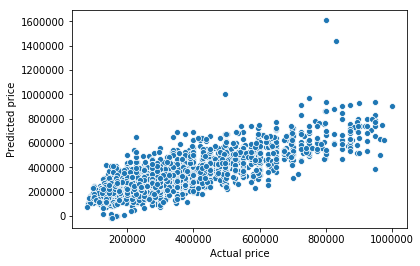

In [14]:
#plot of the predicted price vs. the actual price.
sns.scatterplot(y_test, y_p)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.show()